In [20]:
import numpy as np 
from numpy.linalg import norm 
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)
y = np.random.randn(n_samples)


def soft_thresholding(u, tau):
    return np.sign(u) * np.maximum(0, np.abs(u) - tau)

In [22]:
def ista(X, y, lmbda, n_iter=100):
    L = np.linalg.norm(X, ord=2) ** 2
    beta = np.zeros(X.shape[1])
    objs = np.zeros(n_iter)
    for it in range(n_iter):
        beta = soft_thresholding(beta - 1 / L * X.T @ (X @ beta - y), lmbda/L)
        objs[it] = norm(y - X @ beta) ** 2 / 2 + lmbda * norm(beta, 1)
    return beta, objs

In [34]:
lmbda = norm(X.T @ y, ord=np.inf) / 3

In [35]:
beta, objs = ista(X, y, lmbda)

In [44]:
clf = Lasso(alpha=lmbda/len(y), fit_intercept=False, tol=1e-10).fit(X, y)
beta_star = clf.coef_

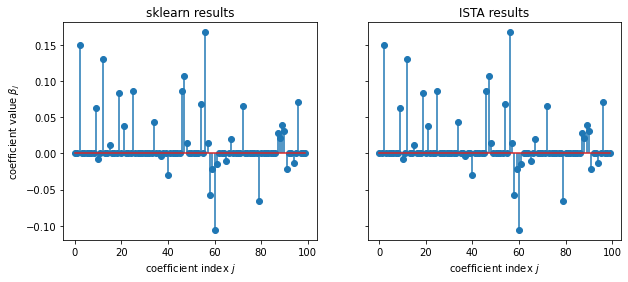

In [45]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axarr[0].stem(beta_star)
axarr[1].stem(beta)

axarr[0].set_ylabel("coefficient value $\\beta_j$")
axarr[0].set_title("sklearn results")
axarr[1].set_title("ISTA results")
for ax in axarr:
    ax.set_xlabel("coefficient index $j$")

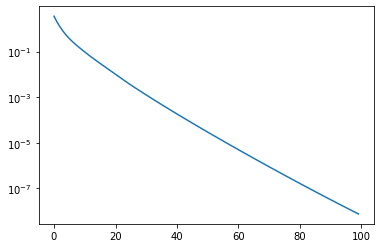

In [46]:
p_star = norm(y - clf.predict(X)) ** 2 / 2 + lmbda * norm(beta_star, ord=1)
plt.semilogy(objs - p_star)
plt.xlabel("iteration")
plt.ylabel("subop")